In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

### Parameters:

In [ ]:
# Parameters
L = 20
theta_values = np.linspace(-L, L, 200)
rollouts = 200000 
beta = 0.5

## Question 2.1:

In [ ]:
# formula to calculate probability of r based on θ
def policy(theta, s, beta):
    return 1 / (1 + np.exp(-beta * (s - theta)))


# single rollout & calculate total reward
def rollout(theta, L):
    state = np.random.randint(-L, L + 1)
    reward_count = 0

    while -L <= state <= L:  # Regular states
        if np.random.rand() < policy(theta, state, beta):
            next_state = state + 1  # right
        else:
            next_state = state - 1  # left

        # To calculate the reward:
        if next_state == L + 1:  # right terminal state
            reward = 20
        elif next_state == -(L + 1):  # left terminal state
            reward = 0
        else:
            reward = -1 
        reward_count += reward
        state = next_state  # Update state

    return reward_count

# estimating J(theta) for a range of theta values using MC rollouts
def J_estimation(theta_values, rollouts, L):
    J_values = []
    for theta in tqdm(theta_values, desc="Estimating J(θ)"):
        rewards = [rollout(theta, L) for _ in range(rollouts)]
        J_values.append(np.mean(rewards))
    return J_values

Estimating J(θ): 100%|██████████| 200/200 [00:30<00:00,  6.51it/s]


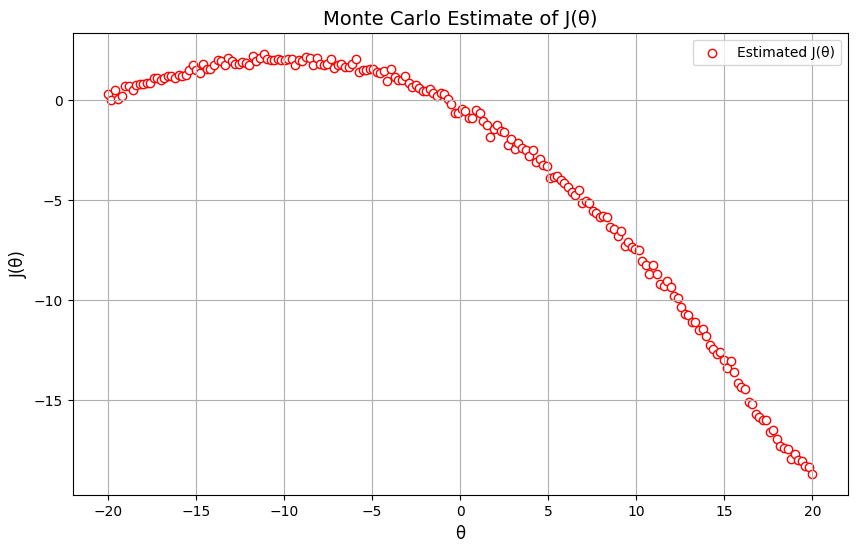

In [ ]:
J_theta = J_estimation(theta_values, rollouts, L)

plt.figure(figsize=(10, 6))
plt.scatter(theta_values, J_theta, color='white', edgecolors='red', label="Estimated J(θ)", marker='o')
plt.xlabel("θ", fontsize=12)
plt.ylabel("J(θ)", fontsize=12)
plt.title("Monte Carlo Estimate of J(θ)", fontsize=14)
plt.grid()
plt.legend()
plt.show()

## Question 2.2

In [ ]:
h = 0.4  # Step size

In [ ]:
# formula from exercise sheet
def numerical_gradient(theta_values, J_values, h):
    """
    Compute the numerical gradient of J(theta) using finite differences.
    """
    gradients = []
    for i in range(len(theta_values) - 1):
        gradient = (J_values[i + 1] - J_values[i]) / (theta_values[i + 1] - theta_values[i])
        gradients.append(gradient)
    return gradients, theta_values[:-1]  #for gradient comparison

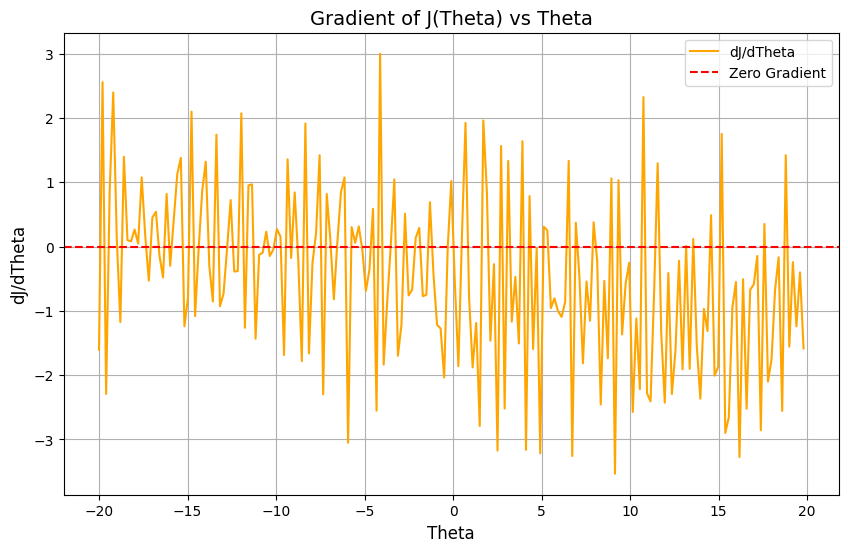

In [ ]:
gradients, gradient_thetas = numerical_gradient(theta_values, J_theta, h)

plt.figure(figsize=(10, 6))
plt.plot(gradient_thetas, gradients, label="dJ/dTheta", color='orange')
plt.axhline(0, color='red', linestyle='--', label="Zero Gradient")  # y=0 where gradient crosses zero
plt.xlabel("Theta", fontsize=12)
plt.ylabel("dJ/dTheta", fontsize=12)
plt.title("Gradient of J(Theta) vs Theta", fontsize=14)
plt.grid()
plt.legend()
plt.show()

## Question 2.3

In [ ]:
# Estimate J(theta) per single theta using MC rollouts
def estimate_J_single_T(theta, rollouts, L):
    rewards = [rollout(theta, L) for _ in range(rollouts)]
    return np.mean(rewards)

# calcutate ∇J(θ) with symmetric finite differences and MC rollouts
def compute_policy_gradient(theta_values, h, rollouts, L, beta):
    gradients = []
    for theta in tqdm(theta_values, desc="Computing ∇J(θ)"):
        J_plus = estimate_J_single_T(theta + h, rollouts, L)  # J(θ + h)
        J_minus = estimate_J_single_T(theta - h, rollouts, L)  # J(θ - h)
        gradient = (J_plus - J_minus) / (2 * h)
        gradients.append(gradient)
    return gradients

Computing ∇J(θ): 100%|██████████| 200/200 [01:00<00:00,  3.31it/s]


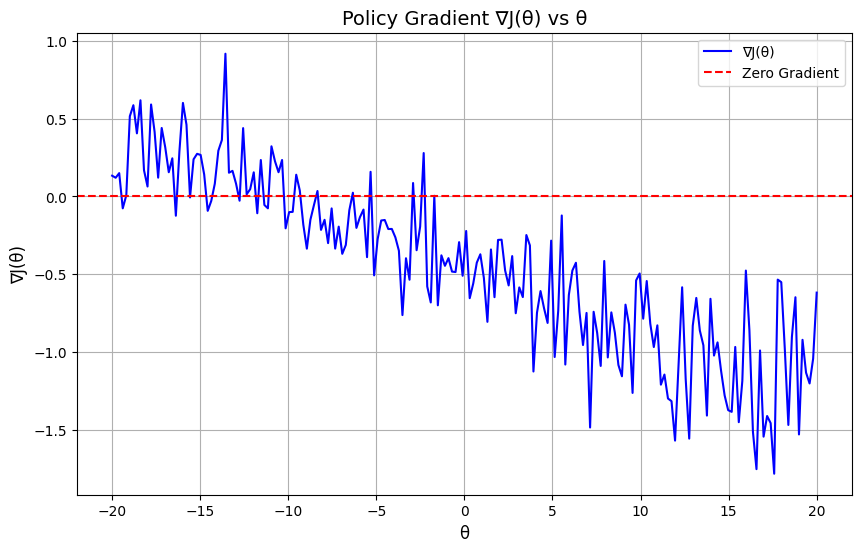

In [ ]:
policy_gradients = compute_policy_gradient(theta_values, h, num_rollouts, L, beta)

plt.figure(figsize=(10, 6))
plt.plot(theta_values, policy_gradients, label="∇J(θ)", color="blue")
plt.axhline(0, color="red", linestyle="--", label="Zero Gradient")
plt.xlabel("θ", fontsize=12)
plt.ylabel("∇J(θ)", fontsize=12)
plt.title("Policy Gradient ∇J(θ) vs θ", fontsize=14)
plt.grid()
plt.legend()
plt.show()

## Question 2.4: 
Pick a starting value for θ= θ_0 (e.g. θ_0 = 0) and perform a relatively small number of roll-outs τ under policy π_θ to estimate v_πθ(s) for all states.

In [134]:
# Parameters 2.4+2.5+2.6
L = 20 
theta = 0  # initial theta
rollouts2 = 5000
states = np.arange(-L, L + 1)  # all possible states
beta = 0.5

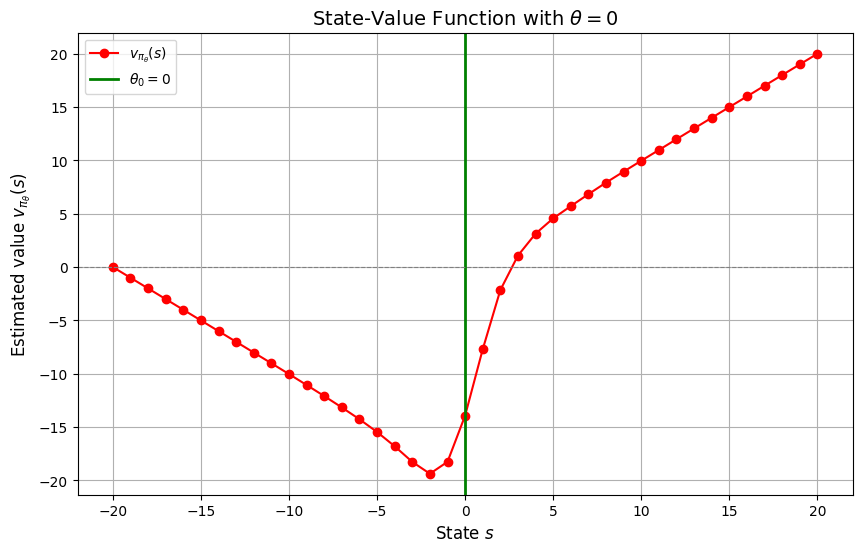

In [135]:
# rollout to estimate value func v_pi_theta(s) for all states
def rollout_q4(theta, L, rollouts2, states):
    value_function = {}
    for state in states:
        total_rewards = []
        for i in range(rollouts2):
            total_reward = 0
            current_state = state
            while -L <= current_state <= L:
                if np.random.rand() < policy(theta, current_state, beta):
                    next_state = current_state + 1  # Go right
                else:
                    next_state = current_state - 1  # Go left
                
                # reward calculation
                if next_state == L + 1:  # Right terminal state
                    reward = 20
                elif next_state == -(L + 1):  # Left terminal state
                    reward = 0
                else:
                    reward = -1  # Regular transition reward
                
                total_reward += reward
                current_state = next_state  # Update state
            
            total_rewards.append(total_reward)
        value_function[state] = np.mean(total_rewards)
    return value_function


value_function = rollout_q4(theta, L, rollouts2, states)

plt.figure(figsize=(10, 6))
plt.plot(states, [value_function[s] for s in states], label=r"$v_{\pi_\theta}(s)$", marker='o', color='red')
# to highlight theta_0 = 0
plt.axvline(0, color='green', linestyle='-', label=r"$\theta_0 = 0$", linewidth=2)
plt.xlabel("State $s$", fontsize=12)
plt.ylabel(r"Estimated value $v_{\pi_\theta}(s)$", fontsize=12)
plt.title("State-Value Function with $\\theta=0$", fontsize=14)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.grid()
plt.legend()
plt.show()


## Question 2.5
Once you have reasonable estimates for the value functions, use eq.6 to estimate the gradient. Do this by averaging over many paths τ. Use the rolled-out paths to continue the updating of the critic (i.e. the value-based advantage computation).

Estimating Gradients: 100%|██████████| 200/200 [22:17<00:00,  6.69s/it]


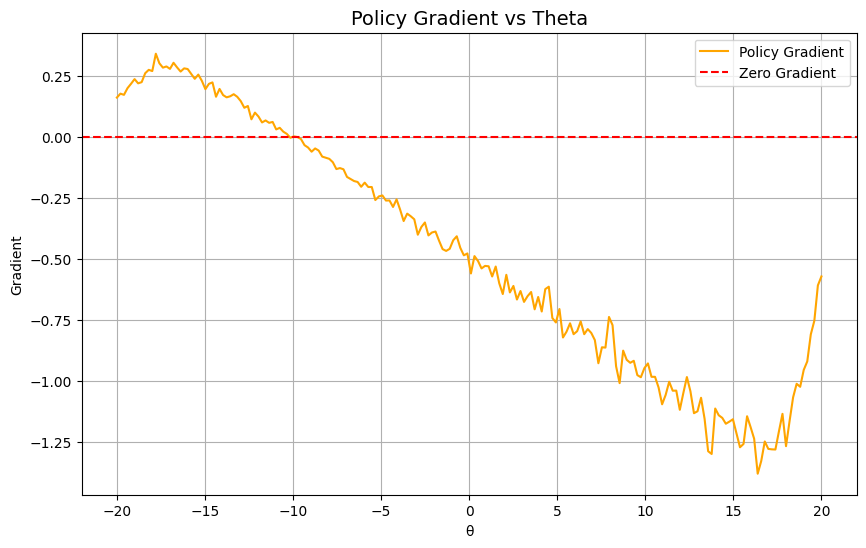

In [ ]:
gamma = 1.0
theta_values = np.linspace(-L, L, 200)

def rollout(theta, L, beta):
    state = np.random.randint(-L, L + 1)
    trajectory = []
    while -L <= state <= L:
        action = "R" if np.random.rand() < policy(theta, state, beta) else "L"
        next_state = state + (1 if action == "R" else -1)
        reward = 20 if next_state == L + 1 else 0 if next_state == -(L + 1) else -1
        trajectory.append((state, action, reward))
        state = next_state
    return trajectory

def compute_gradient(theta, L, beta, value_function, rollouts, gamma=1.0):
    gradient = 0
    for _ in range(rollouts):
        trajectory = rollout(theta, L, beta)
        for state, action, reward in trajectory:
            next_state = state + (1 if action == "R" else -1)
            advantage = reward + gamma * value_function.get(next_state, 0) - value_function.get(state, 0)
            prob_right = policy(theta, state, beta)
            grad_log = beta * (1 - prob_right if action == "L" else prob_right) * (-1 if action == "R" else 1)
            gradient += grad_log * advantage
    return gradient / rollouts

def estimate_gradients(theta_values, L, beta, rollouts, gamma, states):
    return [
        compute_gradient(theta, L, beta, rollout_q4(theta, L, rollouts, states), rollouts, gamma)
        for theta in tqdm(theta_values, desc="Estimating Gradients")
    ]

gradients = estimate_gradients(theta_values, L, beta, rollouts2, gamma, states)

plt.figure(figsize=(10, 6))
plt.plot(theta_values, gradients, label="Policy Gradient", color="orange")
plt.axhline(0, color='red', linestyle='--', label="Zero Gradient")
plt.xlabel("θ")
plt.ylabel("Gradient")
plt.title("Policy Gradient vs Theta", fontsize=14)
plt.legend()
plt.grid()
plt.show()

## Question 2.6
Use the gradient to update θ and repeat. Does A2C converge to the optimal value found in question 1?

Training A2C: 100%|██████████| 300/300 [26:29<00:00,  5.30s/it]


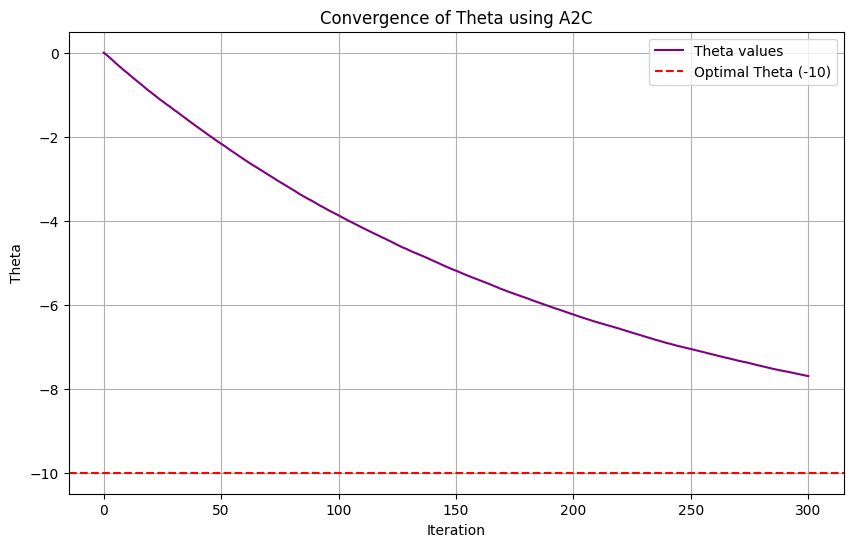

In [137]:
learning_rate = 0.1

#update theta
def update_theta(theta, gradient, learning_rate):
    return theta + learning_rate * gradient

# Track theta
theta_values = [theta]

# 50 A2C updates
for i in tqdm(range(300), desc="Training A2C"):
    estimate_value_function = rollout_q4(theta, L, rollouts2, states)
    gradient = compute_gradient(theta, L, beta, estimate_value_function, rollouts2, gamma)  # policy gradient
    
    # Update theta & track progress
    theta = update_theta(theta, gradient, learning_rate)
    theta_values.append(theta)

plt.figure(figsize=(10, 6))
plt.plot(theta_values, label="Theta values", color="purple")
plt.axhline(-10, color='red', linestyle='--', label="Optimal Theta (-10)")
plt.xlabel("Iteration")
plt.ylabel("Theta")
plt.title("Convergence of Theta using A2C")
plt.grid()
plt.legend()
plt.show()
